<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#Поле-ceiling_height" data-toc-modified-id="Поле-ceiling_height-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Поле ceiling_height</a></span></li><li><span><a href="#Поле-floors_total" data-toc-modified-id="Поле-floors_total-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Поле floors_total</a></span></li><li><span><a href="#Поле-living_area" data-toc-modified-id="Поле-living_area-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Поле living_area</a></span></li><li><span><a href="#Поле-is_apartment" data-toc-modified-id="Поле-is_apartment-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Поле is_apartment</a></span></li><li><span><a href="#Поле-kitchen_area" data-toc-modified-id="Поле-kitchen_area-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Поле kitchen_area</a></span></li><li><span><a href="#Поле-balcony" data-toc-modified-id="Поле-balcony-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Поле balcony</a></span></li><li><span><a href="#Поле-locality_name" data-toc-modified-id="Поле-locality_name-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Поле locality_name</a></span></li><li><span><a href="#Поле-airports_nearest" data-toc-modified-id="Поле-airports_nearest-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Поле airports_nearest</a></span></li></ul></li><li><span><a href="#Шаг-3.-Посчитайте-и-добавьте-в-таблицу" data-toc-modified-id="Шаг-3.-Посчитайте-и-добавьте-в-таблицу-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Шаг 3. Посчитайте и добавьте в таблицу</a></span></li><li><span><a href="#Шаг-4.-Проведите-исследовательский-анализ-данных-и-выполните-инструкции:" data-toc-modified-id="Шаг-4.-Проведите-исследовательский-анализ-данных-и-выполните-инструкции:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:</a></span></li><li><span><a href="#Шаг-5.-Общий-вывод" data-toc-modified-id="Шаг-5.-Общий-вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Шаг 5. Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Обзор данных

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv('real_estate_data.csv',sep='\t')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

- Столбцы имеющие пропущенные значения:
 * ceiling_height
 * floors_total
 * living_area
 * is_apartment
 * kitchen_area
 * balcony
 * locality_name
 * airports_nearest
 * cityCenters_nearest
 * parks_around3000
 * parks_nearest
 * ponds_around3000
 * ponds_nearest
 * days_exposition
- Не верный тип у следующих полей: 
 * is_apartment - bool
 * balcony - int
 * days_exposition - int
 * first_day_exposition - date
 * floors_total - int
 * parks_around3000 - int
 * ponds_around3000 - int 

## Предобработка данных

### Обработка пропусков 

In [3]:
def present(count__x_percent, count_100_percent = len(data)):
    return 100/ (count_100_percent / count__x_percent)

#### Поле ceiling_height

In [4]:
data['ceiling_height'].isna().sum()

9195

In [5]:
present(data['ceiling_height'].isna().sum())

38.799105447487236

In [6]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Медиана согласуется с ожидаемым значением, заполним пропуски медианой.

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [8]:
present(data['ceiling_height'].isna().sum())

0.0

#### Поле floors_total

In [9]:
data['floors_total'].isna().sum()

86

In [10]:
present(data['floors_total'].isna().sum())

0.3628845098949323

In [11]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Медиана согласуется с ожидаемым значением, заполним пропуски медианой.

In [12]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [13]:
present(data['floors_total'].isna().sum())

0.0

#### Поле living_area

In [14]:
data['living_area'].isna().sum()

1903

In [15]:
present(data['living_area'].isna().sum())

8.029874678256467

In [16]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Медиана согласуется с ожидаемым значением, заполним пропуски медианой.

In [17]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [18]:
present(data['living_area'].isna().sum())

0.0

#### Поле is_apartment

In [19]:
present(data['is_apartment'].isna().sum())

88.2906451749019

In [20]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [21]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Логично предположить, что значение True и False перепутаны, так как апартаментов должно быть существенно меньше чем жилых квартир. 

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(True)

In [23]:
data['is_apartment'] = ~data['is_apartment']

In [24]:
data['is_apartment'].value_counts()

False    20974
True      2725
Name: is_apartment, dtype: int64

#### Поле kitchen_area

In [25]:
present(data['kitchen_area'].isna().sum())

9.612219924891345

In [26]:
data[data['kitchen_area'].isna()]['total_area'].describe()

count    2278.000000
mean       56.575680
std        40.863558
min        12.000000
25%        34.000000
50%        46.000000
75%        64.725000
max       500.000000
Name: total_area, dtype: float64

In [27]:
data[(data['studio'] == True) & (data['kitchen_area'].notna())]['total_images'].count()

0

Все квартиры студии имеют пустую площадь кухни. Заполним ее 0 так, как у студий нет отдельной кухни (она совмещена с залом).

In [28]:
data['kitchen_area'].where(data['studio'] == True, 0, inplace = True)

In [29]:
data[(data['studio'] == True) & (data['kitchen_area'].isna())]['studio'].count()

149

In [30]:
present(data['kitchen_area'].isna().sum())

0.628718511329592

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc61184ded0>]],
      dtype=object)

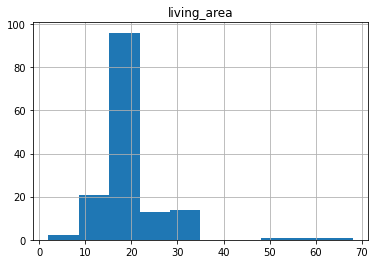

In [31]:
data[data['kitchen_area'].isna()].hist('living_area')

In [32]:
data[data['kitchen_area'].isna()]['total_area'].describe()

count    149.000000
mean      27.783154
std        9.310360
min       15.500000
25%       24.000000
50%       26.000000
75%       29.000000
max       98.400000
Name: total_area, dtype: float64

На гистограмме видно, что очень мало квартир (пимерно 2), общей площадью больше 35 кв. м., имеют пустое поле kitchen_area, скорее всего, в этих квартирах действительно нет кухни.

In [33]:
data['kitchen_area'].fillna(0, inplace=True)

#### Поле balcony

In [34]:
present(data['balcony'].isna().sum())

48.605426389299126

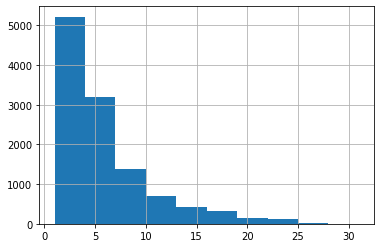

In [35]:
data[data['balcony'].isna()]['floor'].hist()

Количество квартир с не заполненным балконом экспоненциально убывает с ростом этажа, что полностью соответствует нашим ожиданиям для квартир без балконов 

In [36]:
data['balcony'].fillna(0, inplace=True)

#### Поле locality_name

In [37]:
present(data['locality_name'].isna().sum())

0.2067597788936242

In [38]:
data['locality_name'].isna().sum()

49

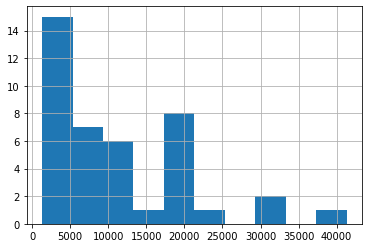

In [39]:
data[data['locality_name'].isna()]['cityCenters_nearest'].hist()

На гистограммами видно, что квартиры с незаполненным названием населенного пункта, в основном, находятся недалеко от центра. Заполним их основываясь на этом расстоянии.

In [40]:
tmp = data[data['cityCenters_nearest'].notna()].groupby('locality_name')['cityCenters_nearest'].median()
tmp = tmp.reset_index().sort_values('cityCenters_nearest').query('cityCenters_nearest < 50000')
tmp

,locality_name,cityCenters_nearest
8,Санкт-Петербург,12244.5
18,посёлок Парголово,19311.0
11,поселок Мурино,21888.0
24,посёлок Стрельна,23506.0
26,посёлок Шушары,24212.0
14,посёлок Левашово,25727.0
19,посёлок Песочный,26099.5
20,посёлок Петро-Славянка,27165.0
15,посёлок Лисий Нос,27297.0
12,посёлок Александровская,27468.0


In [41]:
data[data['cityCenters_nearest'].isna() & data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.6,2,False,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,2.65,4.0,25.8,3,True,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,2.65,9.0,30.0,2,True,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,2.65,5.0,47.3,2,False,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,False,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,2.65,9.0,30.5,2,True,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,2.65,9.0,36.6,2,True,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.60,16.0,16.0,7,True,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


Квартиры, имеющие пустое поле cityCenters_nearest и locality_name, оставим без изменений.

In [42]:
def fill_locality_name(row):
    if pd.notna(row['locality_name']):
        return row.at['locality_name']
    if pd.isna(row['cityCenters_nearest']):
        return row.at['locality_name']
    row = tmp[tmp['cityCenters_nearest'] > row['cityCenters_nearest']].iloc[0]
    return row.at['locality_name']

In [43]:
data['locality_name'] = data.apply(fill_locality_name, axis = 1)

In [44]:
data['locality_name'].isna().sum()

8

#### Поле airports_nearest

In [45]:
present(data['airports_nearest'].isna().sum())

23.38495295160133

In [46]:
data['airports_nearest'].isna().sum()

5542

In [47]:
data[data['airports_nearest'].isna() & data['locality_name'].isna()]['total_images'].count()

8

Те же самые 8 наблюдений

In [48]:
tmp = data[data['airports_nearest'].notna() & data['locality_name'].notna()].groupby('locality_name')['airports_nearest'].median()
tmp = tmp.reset_index().sort_values('airports_nearest')
tmp['locality_name'].unique()

array(['посёлок Александровская', 'Пушкин', 'посёлок Шушары', 'Павловск',
       'посёлок Петро-Славянка', 'Красное Село', 'посёлок Металлострой',
       'Колпино', 'посёлок Усть-Ижора', 'Санкт-Петербург',
       'посёлок Стрельна', 'посёлок Понтонный', 'посёлок Сапёрный',
       'Петергоф', 'Ломоносов', 'поселок Мурино', 'посёлок Левашово',
       'посёлок Парголово', 'посёлок Песочный', 'посёлок Лисий Нос',
       'поселок Лисий Нос', 'Сестрорецк', 'посёлок Белоостров',
       'посёлок Репино', 'посёлок Щеглово', 'Кронштадт', 'Зеленогорск',
       'посёлок Молодёжное'], dtype=object)

In [49]:
data[data['airports_nearest'].isna() & data['locality_name'].notna()]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

Видно, что названия населенных пунктов совпадают лишь частично. Судя по информации из <a href='https://www.google.com/search?newwindow=1&ei=sItUX7viGsqGwPAP-6uYgAU&q=%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%BE%D0%BA+%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%BE%D0%B3%D0%BE+%D1%82%D0%B8%D0%BF%D0%B0+%D0%B4%D1%80%D1%83%D0%B6%D0%BD%D0%B0%D1%8F+%D0%B3%D0%BE%D1%80%D0%BA%D0%B0+%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5+%D0%B4%D0%BE+%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82%D0%B0&oq=%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%BE%D0%BA+%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%BE%D0%B3%D0%BE+%D1%82%D0%B8%D0%BF%D0%B0+%D0%B4%D1%80%D1%83%D0%B6%D0%BD%D0%B0%D1%8F+%D0%B3%D0%BE%D1%80%D0%BA%D0%B0+%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5+%D0%B4%D0%BE+%D0%B0&gs_lcp=CgZwc3ktYWIQAxgAMgUIIRCgATIFCCEQoAEyBQghEKABOgQIABBHSgUICRIBMUoFCAoSATZQ3KQEWPXaBGDB6ARoAHACeACAAYEBiAG0BZIBAzAuNpgBAKABAaoBB2d3cy13aXrAAQE&sclient=psy-ab'> интернета</a>, расстояние до аэропорта в стальных населенных пунктах огромно и не имеет значение, заполним их 0

In [50]:
def fill_airports_nearest(row):
    if pd.notna(row['airports_nearest']):
        return row.at['airports_nearest']
    
    if pd.isna(row['locality_name']):
        return row.at['airports_nearest']
    
    df_frame = tmp[tmp['locality_name'] == row['locality_name']]
    if len(df_frame) == 0:
        return 0
    return df_frame.iloc[0].at['airports_nearest']

In [51]:
data['airports_nearest'] = data.apply(fill_airports_nearest, axis = 1)

In [52]:
data['airports_nearest'].isna().sum()

8

### Шаг 3. Посчитайте и добавьте в таблицу

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Шаг 5. Общий вывод

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод